In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
new_data = np.load('./data/obs_data_car_racing_22.npz')["arr_0"]
data = np.array([item for obs in new_data for item in obs])

In [18]:
print(data.dtype)
print(data.shape)
print(9888*64*64*3*4/1024/1024)

float32
(9888, 64, 64, 3)
463.5


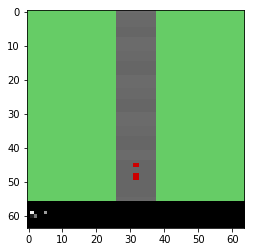

In [5]:
img = data[0]
imgplot = plt.imshow(img)

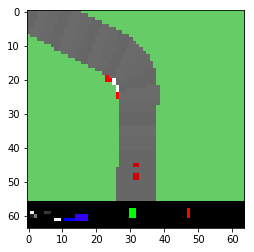

In [12]:
img = data[60]
imgplot = plt.imshow(img)

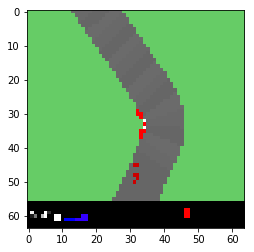

In [13]:
img = data[70]
imgplot = plt.imshow(img)